<a href="https://colab.research.google.com/github/LSMISN/NSI/blob/master/Algorithmique_Terminale_programmation_dynamique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programmation dynamique (DP)

## Introduction


### Retour sur le calcul des termes de la suite de Fibonacci

L'écriture du code récursif permettant de calculer le n-ième terme de la suite de Fibonacci était

```
def fibo(n) :
  if n < 2 :
    return n
  else :
    return fibo(n-1)+fibo(n-2)
```

Si on veux calculer par exemple **fibo(6)**, la représentation sous forme d'arbre des calculs effectués est le suivant :





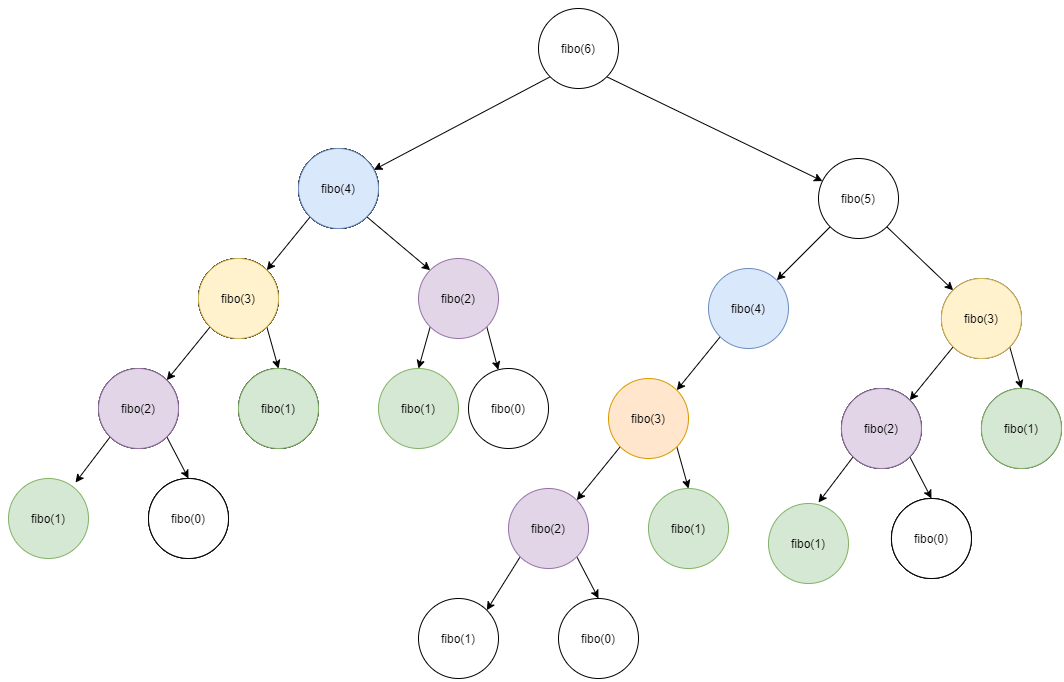

On constate que plusieurs valeurs sont calculées plusieurs fois. Dans le cas où, la valeur de n devient plus grand, le nombre d'appels récursifs peut être bloquant pour la machine qui effectue le calcul.

Les ressources de calcul pourrait être épargnée si on **mémorisait** les résultats au fur à mesure. Ainsi le calcul est fait une seule, et si une autre partie du code en a besoin, on récupère directement la valeur.

Le paradigme **Programmation dynamique (DP)** s'appuie sur ce principe. Comme pour **diviser pour régner (DPR)**, on va découper un problème complexe en sous-problèmes que l'on va résoudre mais dont on va mémoriser les résultats. Cette mémorisation est nécessaire car alors que dans **DPR**, il n'y avait pas de dépendance entre les sous-problèmes, ici les sous-problèmes sont couplés les uns aux autres.



<center>

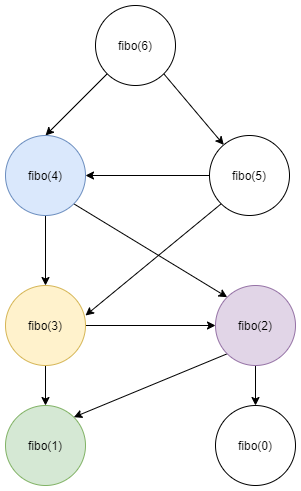)

Cette méthode a été introduite au début des années 1950 par [Richard Bellman](https://fr.wikipedia.org/wiki/Richard_Bellman)

Cette méthode est très utilisée dans la résolution des problèmes d'optimisation.
Le terme « programmation » signifie **planification et ordonnancement**

<center>

![By Source, Fair use, https://en.wikipedia.org/w/index.php?curid=43193672](https://upload.wikimedia.org/wikipedia/en/7/7a/Richard_Ernest_Bellman.jpg)

</center>

### Amélioration du code de la fonction Fibo version DP


```
def fibo_memo(n):
  mem = [0]*(n+1)  #permet de créer un tableau contenant n+1 zéro
  return fibo_memo_calcul(n,mem)

def fibo_memo_calcul(n,m):
  if n==0 or n==1:
    m[n]=n
    return n
  elif m[n]>0:
    return m[n]
  else:
    m[n]=fib_mem_calcul(n-1,m) + fib_mem_calcul(n-2,m)
    return m[n]
```

On crée un tableau dont toutes les valeur sont initialisées à zéro. On effectue le calcul et le mémorise que si il n'a pas été déjà effectué (sa valeur dans le tableau est nulle).




L'opération de **mémorisation** consomme également des ressources, mais pour des valeurs élevées de n, le gain en termes de performance (temps de calcul) est très avantageux. Dans le cas du programme récursif "classique" le nombre d'appels récursifs peut bloquer le déroulement du calcul.

On peut dire que la résolution algorithmique d’un problème relève de la programmation dynamique si

▷ le problème peut être résolu à partir de sous-problèmes similaires mais plus petits ;

▷ l’ensemble de ces sous-problèmes est discret, c’est-à-dire qu’on peut les indexer et ranger les résultats dans un tableau ;

▷ la solution optimale au problème posé s’obtient à partir des solutions optimales des sous-problèmes ;

▷ les sous-problèmes ne sont pas indépendants et un traitement récursif fait apparaître les mêmes sous-problèmes un grand
nombre de fois.

## Exemple 1 : Problème de l'alignement de séquence

### 1)Notion de séquence


**Une séquence** est une suite finie de symboles pris dans un alphabet, par exemple une suite de chiffres (entre 0 et 9) ou de lettres (entre a et z).

En bio-informatique, les chaînes "CTTGGG" et "TCGAA" sont des séquences sur l’alphabet {A,C,G,T} utilisé les acides aminés présents par exemple dans l'ADN.

La chaîne "00110101" est une séquence sur l’alphabet {0,1}.

Une **sous-séquence** est une suite de lettres, **non nécessairement contiguës**, d’une séquence, qui en respecte l’ordre.


Les chaînes "aie" et "ble" sont ainsi des **sous-séquences** de la chaîne abeille.

<center>


![Structure de la double hélice d'ADN](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/DNA_structure_and_bases_FR.svg/245px-DNA_structure_and_bases_FR.svg.png)

</center>

### 2) Pourquoi rechercher les alignements de séquences en biologie ?


Une séquence contient les informations sur le rôle biologique d’une
macromolécule :

- fonction, relation avec les autres molécules …

- Une séquence reflète les contraintes physico-chimiques imposées
par la fonction, l’environnement (aqueux, lipidiques, intra- ou extracellulaire), l’évolution moléculaire

Un des objectifs de la recherche d'alignement est donc de **Prédire des informations pertinentes sur la fonction d’une macromolécule à partir seulement de sa séquence**.

<center>

![Alignement de séquences de récepteurs nucléaires. Les acides aminés conservés sont surlignés en bleu et en vert. Par endroits, on a inséré des trous, symbolisés par des tirets « - », pour permettre un alignement optimal](https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Multalign.svg/800px-Multalign.svg.png)

### 3) Comparaison et alignement

Il est facile de concevoir une mesure de similarité entre deux séquences de même longueur, par exemple en se limitant à compter le nombre de caractères qui diffèrent. Ainsi, sur la figure suivante, les deux séquences (b) seront considérées plus similaires que les deux séquences (a).

<center>

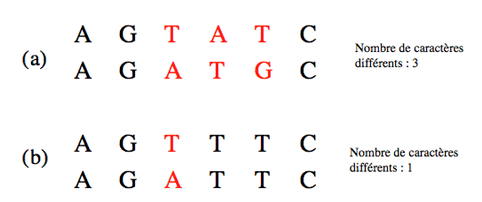

<center>

Mais le problème de la comparaison de séquences est un peu plus compliqué, pour deux raisons :

 - d'une part, les séquences à comparer ont rarement la même longueur ; 
 - et même quand c’est le cas, rien ne dit qu’elles doivent être comparées sur cette longueur exactement.

<center>

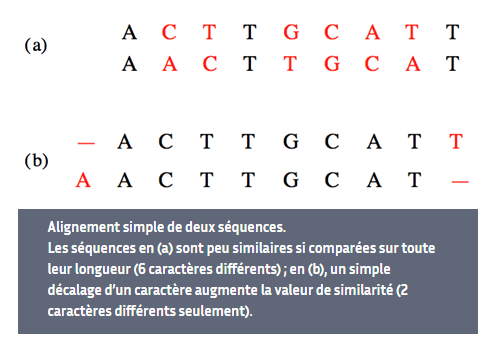

</center>

Au cours de l’évolution, des nucléotides ou des acides aminés ont pu s’insérer ou au contraire disparaître .

Pour tenir compte de ces insertions ou délétions éventuelles, il faut introduire un caractère particulier, appelé gap et noté « — ».

La mise en correspondance d’un caractère d’une séquence avec un gap dans l’autre séquence s’interprète soit comme une insertion du caractère dans la première séquence, soit comme une délétion d’un caractère dans la seconde, et rend compte d’une insertion ou d’une délétion d’un nucléotide dans la macromolécule d’ADN ou d’un acide aminé dans le polypeptide.

<center>

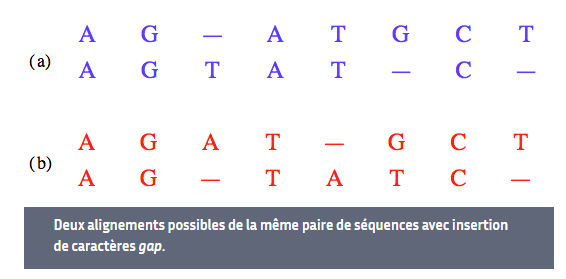

</center>

### 4) Similarité  et coût.

Afin de déterminer le degré de similarité des 2 séquences, on va les comparer caractère par caractère. Il sera parfois nécessaire d'insérer un gap, ou bien de procéder à une substitution.

On va affecté un coût (pénalité) à toutes les opérations qui modifient les séquences initiale, alors qu'un alignement ne coûtera rien.

Le tableau rassemblant les coûts affectés à chaque opération se nomme matrice de substitution.

On peut par exemple utiliser la matrice unité : un alignement ne coûte rien, tout autre opération coûte 1.

<center>

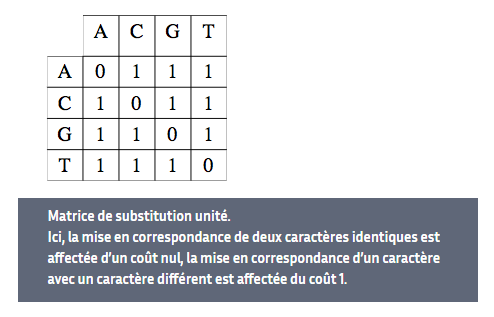

</center>

#### Exercice : déterminer le coût d'alignement des 2 séquences a) et b) si dessus, en prenant un coût de 2 pour l'insertion d'un gap.


Le coût est de 6 pour le cas a) (3 insertions)

Le coût est de 7 pour le cas b) (3 insertions, et un substitution)

On va déterminer le degré de similarité des séquences, en faisant le total des coûts des opérations faites sur les séquences pour pouvoir les aligner.

L'optimisation de l'alignement des séquences va se faire en minimisant le coût des opérations faites sur les séquences à comparer.

# Quelques références

[Article Wikipédia sur la programmation dynamique](https://fr.wikipedia.org/wiki/Programmation_dynamique)

[Article Wikipédia sur l'alignement de séquence](https://fr.wikipedia.org/wiki/Alignement_de_s%C3%A9quences)

[Alignement optimal et comparaison de séquences génomiques et protéiques](https://interstices.info/alignement-optimal-et-comparaison-de-sequences-genomiques-et-proteiques/)
